google colab GPU 사용량 제한의 문제로 실행하지 못해 geom_boxplot()출력과 카이제곱 검정 부분을 따로 해당 파일에 작성했습니다.

---



1. 데이터 취득과 정제

In [ ]:
system(" sudo apt-get install fonts-nanum-coding") #한글 깨지는 문제 해결
install.packages("extrafont")
library(extrafont)
options(warn = -1)
font_import(pattern = "Nanum") # 또는 font_import() 전체.. 시간 오래 걸림
# Continue? [y/n] 질문이 나오면 y
fonts() # 폰트 확인 되면 완료, 이후 메뉴 - 런타임 - 런타임 재시작

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘extrafontdb’, ‘Rttf2pt1’


Registering fonts with R



Importing fonts may take a few minutes, depending on the number of fonts and the speed of the system.
Continue? [y/n] y


Scanning ttf files in /usr/share/fonts/, /usr/local/share/fonts/ ...

Extracting .afm files from .ttf files...

/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf
 => /usr/local/lib/R/site-library/extrafontdb/metrics/NanumBarunGothic

/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf
 => /usr/local/lib/R/site-library/extrafontdb/metrics/NanumBarunGothicBold

/usr/share/fonts/truetype/nanum/NanumGothic.ttf
 => /usr/local/lib/R/site-library/extrafontdb/metrics/NanumGothic

/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf
 => /usr/local/lib/R/site-library/extrafontdb/metrics/NanumGothicBold

/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf
 => /usr/local/lib/R/site-library/extrafontdb/metrics/NanumGothicCoding

/usr/share/fonts/truetype/nanum/NanumGothicCodingBold.ttf
 => /usr/local/lib/R/site-library/extrafontdb/metrics/NanumGothicCodingBold

/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf
 => /usr/local/lib/R/site-library/extrafontdb/metrics/NanumMyeongjo

/usr/share/

[1] "NanumBarunGothic"         "NanumGothic"             
[3] "NanumGothicCoding"        "NanumMyeongjo"           
[5] "NanumSquare Bold"         "NanumSquare"             
[7] "NanumSquareRound Bold"    "NanumSquareRound Regular"

In [1]:
install.packages(c("tidyverse", "caret", "e1071", "Hmisc","dplyr"))
library(tidyverse)
library(data.table)
library(ggplot2)
library(caret)
library(dplyr)
# 출력 그래프 크기 변경
library(repr)


Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘iterators’, ‘Rcpp’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘checkmate’, ‘htmlwidgets’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’, ‘proxy’, ‘gridExtra’, ‘htmlTable’, ‘viridis’, ‘Formula’


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

In [3]:
options(repr.plot.width=17, repr.plot.height=7)

In [4]:
install.packages("data.table")
library("data.table")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [5]:
install.packages("dplyr")
library(dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [6]:
#https://drive.google.com/file/d/1WpUs9z0SID5hwA6Xx_6VWRx0l8RIcKCH/view?usp=sharing #train data
#https://drive.google.com/file/d/10PMjZ0Y-KoRdFlZ6B5VhJjpf20dyAXAn/view?usp=drive_link #test data
system("gdown --id 1WpUs9z0SID5hwA6Xx_6VWRx0l8RIcKCH")
system("ls", TRUE) #파일 확인

[1] "sample_data" "train.csv"

In [7]:
# 파일 읽기
train <- fread("/content/train.csv", header = T, encoding = "UTF-8") %>% as_tibble()
train %>% show()

# A tibble: 39,609 × 23
   ID             사고일시      요일  기상상태 시군구 도로형태 노면상태 사고유형
   <chr>          <chr>         <chr> <chr>    <chr>  <chr>    <chr>    <chr>   
 1 ACCIDENT_00000 2019-01-01 00 화요… 맑음     대구…  단일로 … 건조     차대사람
 2 ACCIDENT_00001 2019-01-01 00 화요… 흐림     대구…  단일로 … 건조     차대사람
 3 ACCIDENT_00002 2019-01-01 01 화요… 맑음     대구…  단일로 … 건조     차대사람
 4 ACCIDENT_00003 2019-01-01 02 화요… 맑음     대구…  단일로 … 건조     차대차  
 5 ACCIDENT_00004 2019-01-01 04 화요… 맑음     대구…  단일로 … 건조     차대차  
 6 ACCIDENT_00005 2019-01-01 04 화요… 맑음     대구…  단일로 … 건조     차대차  
 7 ACCIDENT_00006 2019-01-01 05 화요… 맑음     대구…  교차로 … 건조     차대차  
 8 ACCIDENT_00007 2019-01-01 06 화요… 흐림     대구…  단일로 … 건조     차대차  
 9 ACCIDENT_00008 2019-01-01 06 화요… 맑음     대구…  기타 - … 건조     차대차  
10 ACCIDENT_00009 2019-01-01 10 화요… 맑음     대구…  단일로 … 건조     차대차  
# ℹ 39,599 more rows
# ℹ 15 more variables: `사고유형 - 세부분류` <chr>, 법규위반 <chr>,
#   `가해운전자 차종` <chr>, `가해운전자 성별` <chr>, `가해운전자 연령` <chr>,
#   `가해운전자 상해정도` <chr>, `피해운전자 차종` <

In [8]:
# 컬럼 이름 공백 제거

colnames(train)[9]<-'사고유형세부분류'

colnames(train)[11]<-'가해운전자차종'
colnames(train)[12]<-'가해운전자성별'
colnames(train)[13]<-'가해운전자연령'
colnames(train)[14]<-'가해운전자상해정도'

colnames(train)[15]<-'피해운전자차종'
colnames(train)[16]<-'피해운전자성별'
colnames(train)[17]<-'피해운전자연령'

colnames(train)[18]<-'피해운전자상해정도'

head(train,2)

ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형세부분류,법규위반,⋯,가해운전자상해정도,피해운전자차종,피해운전자성별,피해운전자연령,피해운전자상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>
ACCIDENT_00000,2019-01-01 00,화요일,맑음,대구광역시 중구 대신동,단일로 - 기타,건조,차대사람,길가장자리구역통행중,안전운전불이행,⋯,상해없음,보행자,여,70세,중상,0,1,0,0,5
ACCIDENT_00001,2019-01-01 00,화요일,흐림,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대사람,보도통행중,기타,⋯,상해없음,보행자,남,61세,경상,0,0,1,0,3


In [9]:
# 범주형 컬럼 factor 타입으로 변경

train$요일<- as.factor(train$요일)
train$기상상태<- as.factor(train$기상상태)
train$도로형태<- as.factor(train$도로형태)
train$노면상태<- as.factor(train$노면상태)
train$사고유형<- as.factor(train$사고유형)
train$사고유형세부분류<- as.factor(train$사고유형세부분류)

In [10]:
train$법규위반<- as.factor(train$법규위반)
train$가해운전자차종<- as.factor(train$가해운전자차종)
train$가해운전자성별<- as.factor(train$가해운전자성별)
train$가해운전자상해정도<- as.factor(train$가해운전자상해정도)

In [11]:
# factor에 조건을 주려면 as.factor 아닌 factor 사용 / 두 가지 이상은 c로 묶기
#patients$gender <- factor(patients$gender, level=c("M","F"), labels=c("남자","여자")) #4번
train$피해운전자차종<- as.factor(train$피해운전자차종)
train$피해운전자성별<- as.factor(train$피해운전자성별)
train$피해운전자상해정도<- as.factor(train$피해운전자상해정도)

head(train,2)

ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형세부분류,법규위반,⋯,가해운전자상해정도,피해운전자차종,피해운전자성별,피해운전자연령,피해운전자상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
<chr>,<chr>,<fct>,<fct>,<chr>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<chr>,<fct>,<int>,<int>,<int>,<int>,<int>
ACCIDENT_00000,2019-01-01 00,화요일,맑음,대구광역시 중구 대신동,단일로 - 기타,건조,차대사람,길가장자리구역통행중,안전운전불이행,⋯,상해없음,보행자,여,70세,중상,0,1,0,0,5
ACCIDENT_00001,2019-01-01 00,화요일,흐림,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대사람,보도통행중,기타,⋯,상해없음,보행자,남,61세,경상,0,0,1,0,3


In [12]:
# 가해운전자연령, 피해운전자연령 int형으로 변경

train$가해운전자연령 <- substr(train$가해운전자연령, 1, 2)#"세"빼고 나이 부분만 자르기(앞 숫자 2개)
head(train$가해운전자연령)
train$피해운전자연령 <- substr(train$피해운전자연령, 1, 2) #"세"빼고 나이 부분만 자르기
head(train$피해운전자연령)

as.numeric()

[1] "51" "39" "70" "49" "30" "52"

[1] "70" "61" "38" "36" "52" "35"

numeric(0)

In [13]:
train$가해운전자연령 <- as.numeric(train$가해운전자연령)
train$피해운전자연령 <- as.numeric(train$피해운전자연령)
typeof(train$가해운전자연령)
typeof(train$피해운전자연령)

head(train,2)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


[1] "double"

[1] "double"

ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형세부분류,법규위반,⋯,가해운전자상해정도,피해운전자차종,피해운전자성별,피해운전자연령,피해운전자상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
<chr>,<chr>,<fct>,<fct>,<chr>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<dbl>,<fct>,<int>,<int>,<int>,<int>,<int>
ACCIDENT_00000,2019-01-01 00,화요일,맑음,대구광역시 중구 대신동,단일로 - 기타,건조,차대사람,길가장자리구역통행중,안전운전불이행,⋯,상해없음,보행자,여,70,중상,0,1,0,0,5
ACCIDENT_00001,2019-01-01 00,화요일,흐림,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대사람,보도통행중,기타,⋯,상해없음,보행자,남,61,경상,0,0,1,0,3


1-2) tibble() : 데이터프레임 처리 시 편의성과 일관성 높음

In [14]:
train<- as.tibble(train)
head(train, 2)

Warning message:
“`as.tibble()` was deprecated in tibble 2.0.0.
ℹ Please use `as_tibble()` instead.
ℹ The signature and semantics have changed, see `?as_tibble`.”


ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형세부분류,법규위반,⋯,가해운전자상해정도,피해운전자차종,피해운전자성별,피해운전자연령,피해운전자상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
<chr>,<chr>,<fct>,<fct>,<chr>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<dbl>,<fct>,<int>,<int>,<int>,<int>,<int>
ACCIDENT_00000,2019-01-01 00,화요일,맑음,대구광역시 중구 대신동,단일로 - 기타,건조,차대사람,길가장자리구역통행중,안전운전불이행,⋯,상해없음,보행자,여,70,중상,0,1,0,0,5
ACCIDENT_00001,2019-01-01 00,화요일,흐림,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대사람,보도통행중,기타,⋯,상해없음,보행자,남,61,경상,0,0,1,0,3


1-3) 결측값 처리

In [15]:
sum(is.na(train))

[1] 2516

In [16]:
table(is.na(train)) # 결측값 2124개


 FALSE   TRUE 
908491   2516 

In [17]:
train = na.omit(train) #결측치 제거
table(is.na(train))


 FALSE 
853944 

2-1) select() : 학습에 사용할 열(변수)추출

In [18]:
#사용할 피처 선택해서 train 데이터 다시 구성
train <- train %>% select(도로형태, 노면상태, 사고유형, 사고유형세부분류, 법규위반, 가해운전자차종, 가해운전자연령, 가해운전자상해정도, 피해운전자차종, 피해운전자연령, 피해운전자상해정도, 사망자수, 중상자수, 경상자수, 부상자수, ECLO)
train %>% show()

# A tibble: 37,128 × 16
   도로형태          노면상태 사고유형 사고유형세부분류  법규위반 가해운전자차종
   <fct>             <fct>    <fct>    <fct>             <fct>    <fct>         
 1 단일로 - 기타     건조     차대사람 길가장자리구역통… 안전운…  승용          
 2 단일로 - 기타     건조     차대사람 보도통행중        기타     승용          
 3 단일로 - 기타     건조     차대사람 차도통행중        안전운…  승용          
 4 단일로 - 기타     건조     차대차   추돌              안전운…  승용          
 5 단일로 - 기타     건조     차대차   추돌              안전운…  승용          
 6 단일로 - 기타     건조     차대차   측면충돌          안전운…  승합          
 7 교차로 - 교차로안 건조     차대차   측면충돌          교차로…  승용          
 8 단일로 - 기타     건조     차대차   추돌              안전운…  승용          
 9 기타 - 기타       건조     차대차   기타              안전운…  승용          
10 단일로 - 터널     건조     차대차   기타              신호위반 승용          
# ℹ 37,118 more rows
# ℹ 10 more variables: 가해운전자연령 <dbl>, 가해운전자상해정도 <fct>,
#   피해운전자차종 <fct>, 피해운전자연령 <dbl>, 피해운전자상해정도 <fct>,
#   사망자수 <int>, 중상자수 <int>, 경상자수 <int>, 부상자수 <int>, ECLO <int>


2-2) mutate() : 새로운 열 추가

In [19]:
# 사망자수 + 중상자수 컬럼(사망중상자수) 생성
# 경상자수 + 부상자수 컬럼(경상부상자수) 생성
# 사망중상자수 컬럼, 경상부상자수 컬럼 train 데이터에 추가
train <- train %>% mutate(사망중상자수 = 사망자수 + 중상자수)
train <- train %>% mutate(경상부상자수 = 경상자수 + 부상자수)
# 사망자수, 중상자수, 경상자수, 부상자수 열 없애기
train <- train[, -(12:15)]
head(train)

도로형태,노면상태,사고유형,사고유형세부분류,법규위반,가해운전자차종,가해운전자연령,가해운전자상해정도,피해운전자차종,피해운전자연령,피해운전자상해정도,ECLO,사망중상자수,경상부상자수
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<int>,<int>,<int>
단일로 - 기타,건조,차대사람,길가장자리구역통행중,안전운전불이행,승용,51,상해없음,보행자,70,중상,5,1,0
단일로 - 기타,건조,차대사람,보도통행중,기타,승용,39,상해없음,보행자,61,경상,3,0,1
단일로 - 기타,건조,차대사람,차도통행중,안전운전불이행,승용,70,상해없음,보행자,38,경상,3,0,1
단일로 - 기타,건조,차대차,추돌,안전운전불이행,승용,49,상해없음,승용,36,중상,5,1,0
단일로 - 기타,건조,차대차,추돌,안전운전불이행,승용,30,상해없음,승용,52,경상,3,0,1
단일로 - 기타,건조,차대차,측면충돌,안전운전불이행,승합,52,상해없음,승용,35,경상,6,0,2


2-3) 연령 범주화

In [20]:
train$가해운전자연령 <- ifelse(train$가해운전자연령 >= 20 &train$가해운전자연령 < 30, 20,
                         ifelse(train$가해운전자연령 >= 30 &train$가해운전자연령 < 40, 30,
                         ifelse(train$가해운전자연령 >= 40 &train$가해운전자연령 < 50, 40,
                         ifelse(train$가해운전자연령 >= 50 &train$가해운전자연령 < 60, 50,
                         ifelse(train$가해운전자연령 >= 60 &train$가해운전자연령 < 70, 60,
                         70)))))
summary(train$가해운전자연령)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  20.00   30.00   50.00   45.17   60.00   70.00 

In [21]:
train$피해운전자연령 <- ifelse(train$피해운전자연령 >= 20 &train$피해운전자연령 < 30, 20,
                         ifelse(train$피해운전자연령 >= 30 &train$피해운전자연령 < 40, 30,
                         ifelse(train$피해운전자연령 >= 40 &train$피해운전자연령 < 50, 40,
                         ifelse(train$피해운전자연령 >= 50 &train$피해운전자연령 < 60, 50,
                         ifelse(train$피해운전자연령 >= 60 &train$피해운전자연령 < 70, 60,
                         70)))))
summary(train$피해운전자연령)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  20.00   30.00   40.00   43.17   60.00   70.00 

4. 전처리

4-1) geom_boxplot()

In [ ]:
install.packages("ggthemes")
library(ggthemes)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



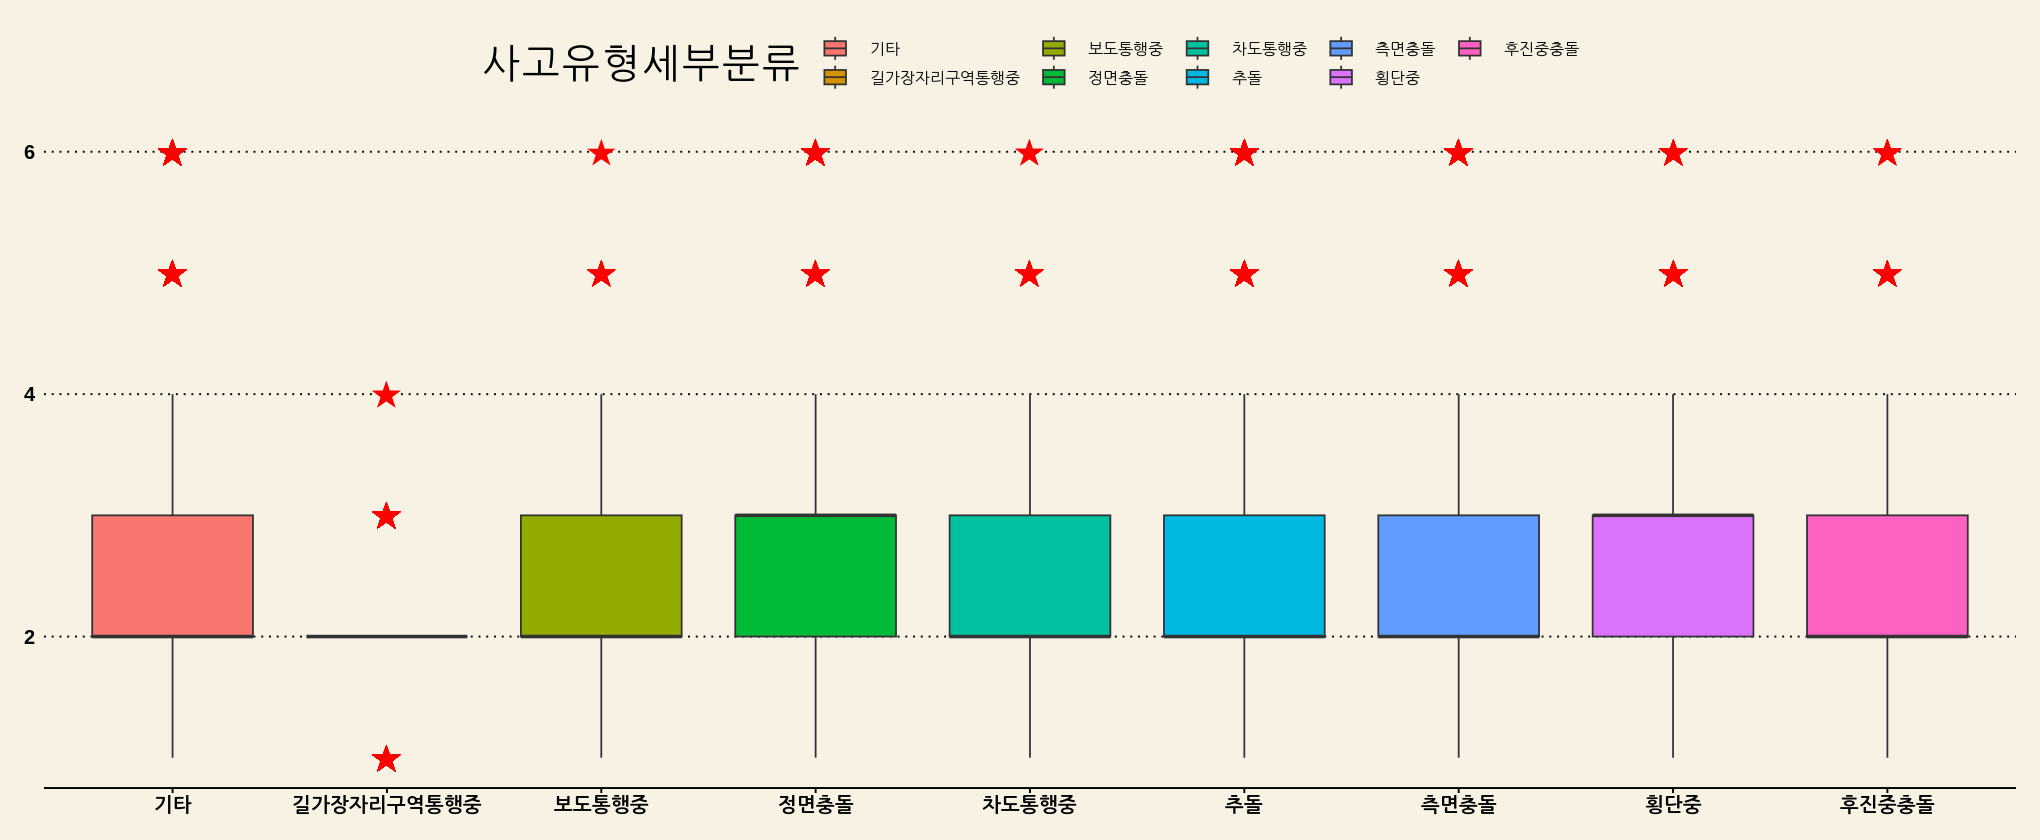

In [ ]:
ggplot(data=train, mapping=aes(x=사고유형세부분류, y=ECLO)) +
geom_boxplot(mapping=aes(fill=사고유형세부분류), outlier.color="red", outlier.shape="★", outlier.size=7) +
#geom_text(mapping=aes(label=is_out), na.rm=T, vjust=-1) +
theme(axis.title.x=element_text(family = fonts()[1])) + # 한글 설정.
theme_wsj()

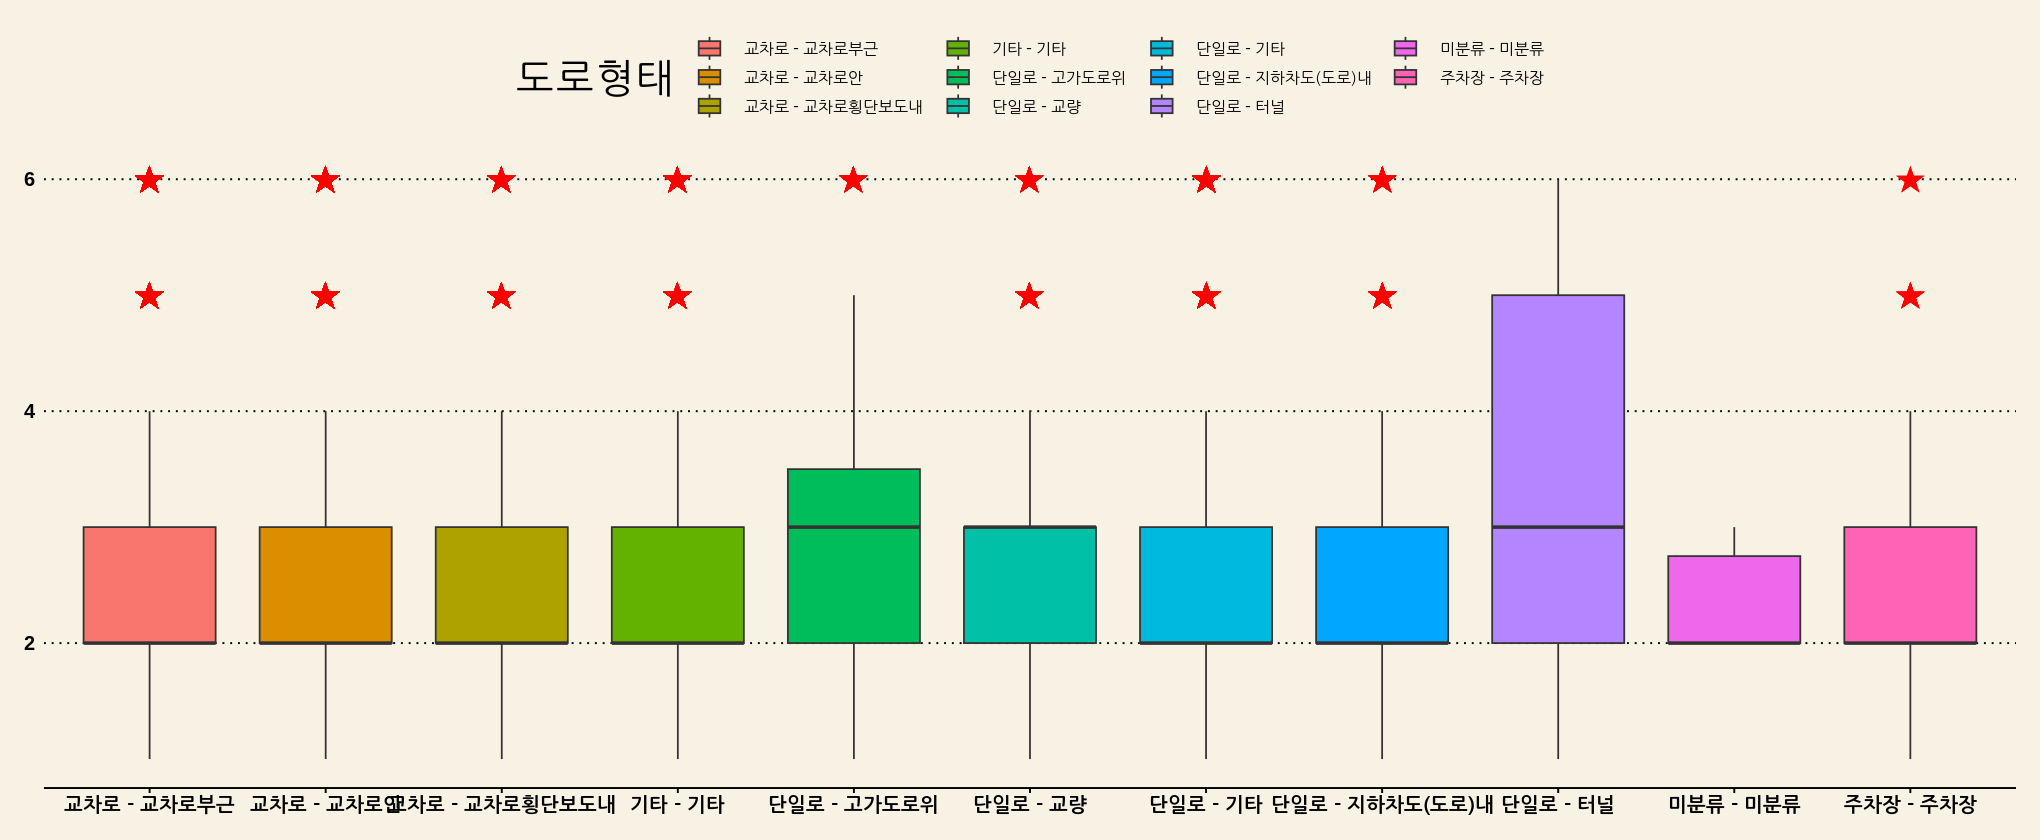

In [ ]:
ggplot(data=train, mapping=aes(x=도로형태, y=ECLO)) +
geom_boxplot(mapping=aes(fill=도로형태), outlier.color="red", outlier.shape="★", outlier.size=7) +
#geom_text(mapping=aes(label=is_out), na.rm=T, vjust=-1) +
theme(axis.title.x=element_text(family = fonts()[1])) + # 한글 설정.
theme_wsj()

In [ ]:
install.packages("GGally")
install.packages("PerformanceAnalytics")
install.packages("corrr")
library(GGally)
library(PerformanceAnalytics)
library(corrr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



######################### Warning from 'xts' package ##########################
#                                                                             #
# The dplyr lag() function breaks how base R's lag() function is supposed to  #
# work, which breaks lag(my_xts). Calls to lag(my_xts) that you type or       #
# source() into this session won't work correctly.                            #
#                                                                             #
# Use stats::lag() to make sure you're not using dplyr::lag(), or you can add #
# conflictRule

Non-numeric variables removed from input: `도로형태`, `노면상태`, `사고유형`, `사고유형세부분류`, `법규위반`, `가해운전자차종`, `가해운전자상해정도`, `피해운전자차종`, and `피해운전자상해정도`
Correlation computed with
• Method: 'pearson'
• Missing treated using: 'pairwise.complete.obs'


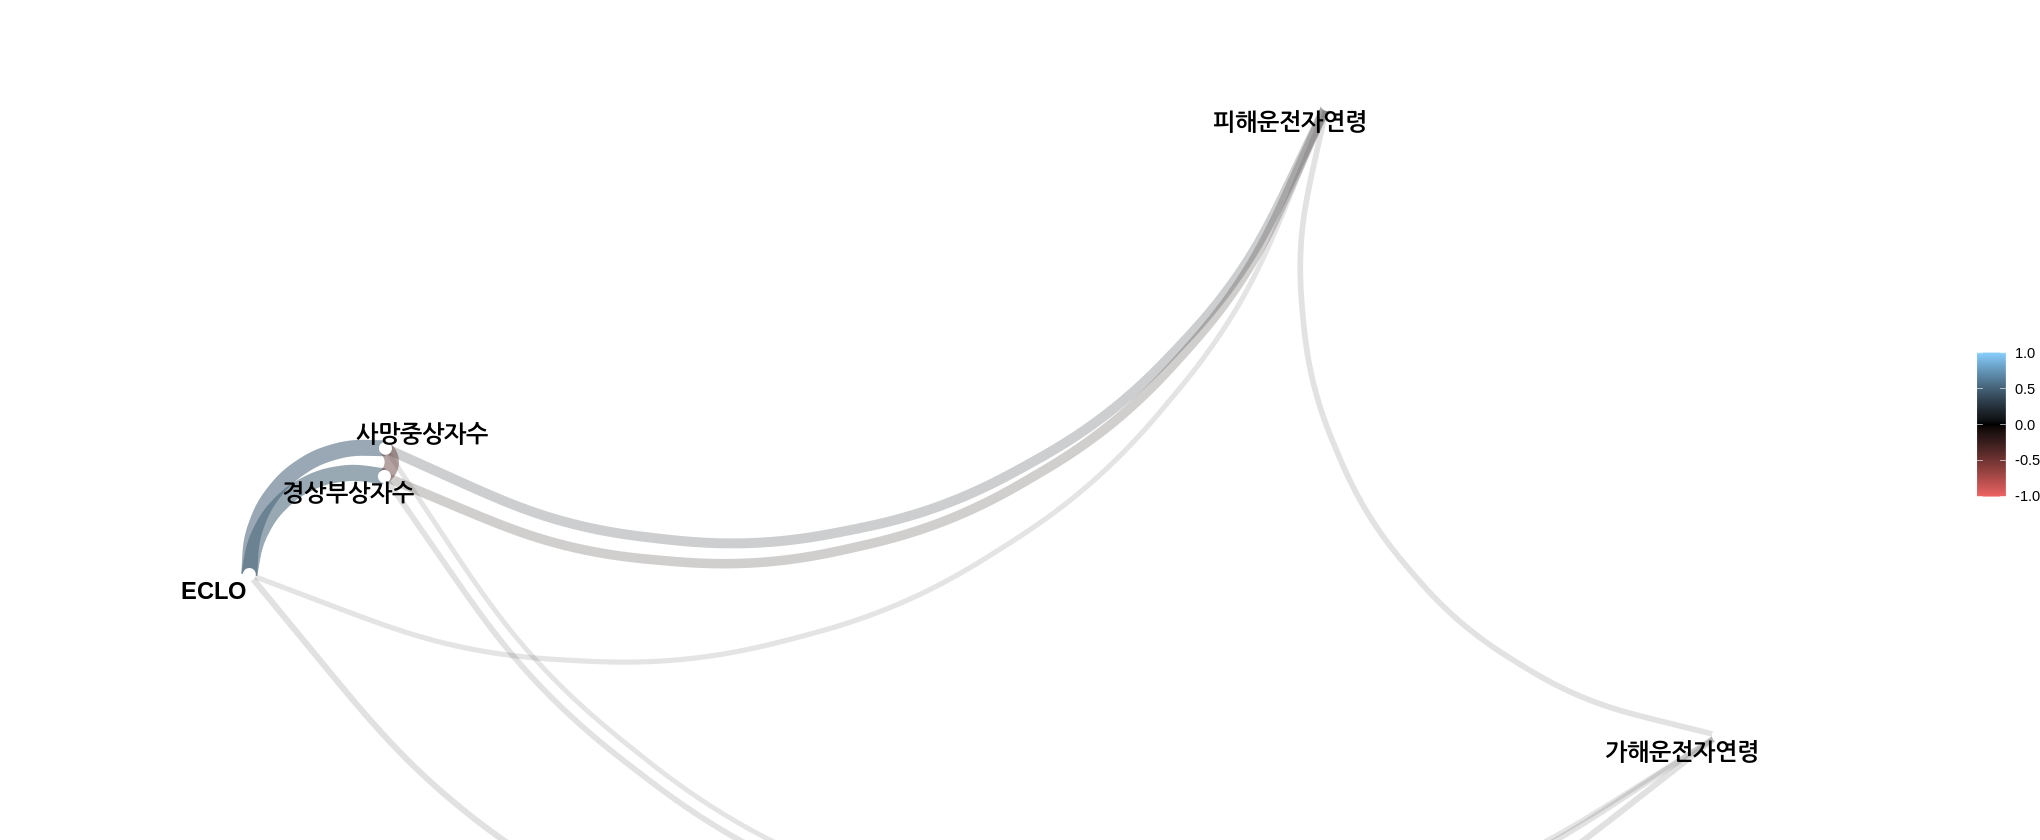

In [ ]:
train %>%
  correlate() %>%
  network_plot(min_cor=0, colours = c("indianred2", "black", "skyblue1"))

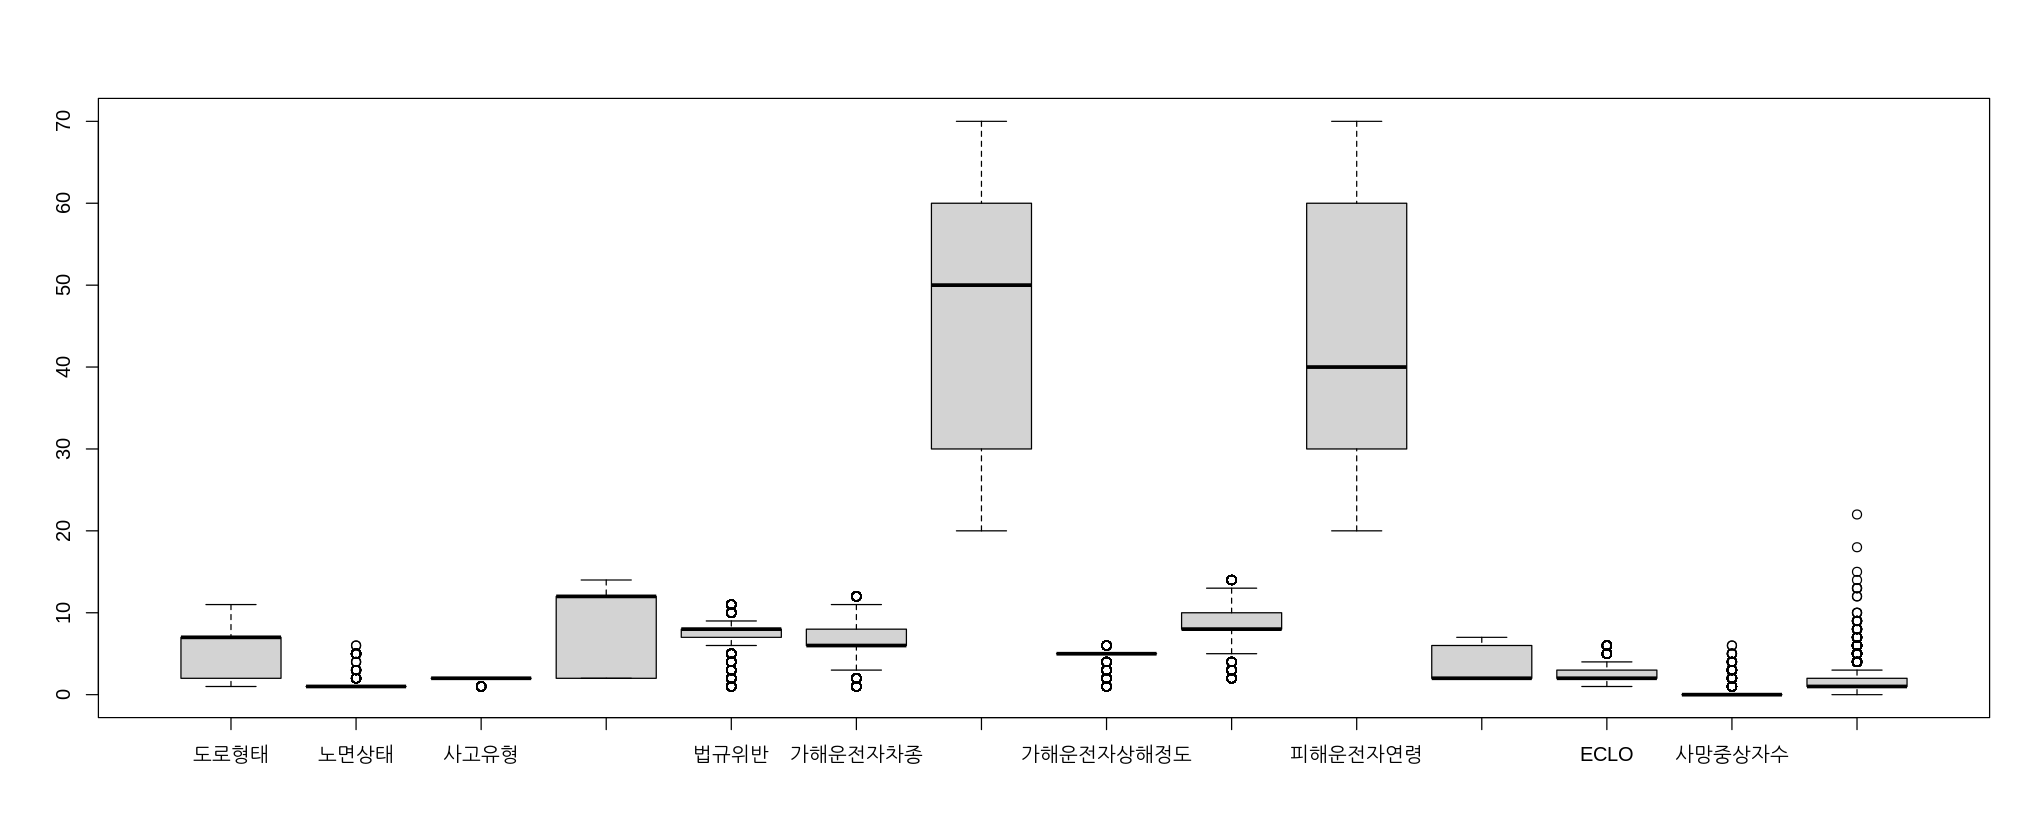

In [ ]:
boxplot(train)

카이제곱검정 (CrossTable)

In [25]:
library(dplyr)

In [29]:
train$사망중상자수 <- ifelse(train$사망중상자수 > 0, 1, # 사망중상자가 있으면 1, 없으면 0
                         0)
summary(train$사망중상자수)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.2464  0.0000  1.0000 

In [28]:
train$경상부상자수 <- ifelse(train$경상부상자수 > 0, 1, # 사망중상자가 있으면 1, 없으면 0
                         0)
summary(train$경상부상자수)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  1.0000  1.0000  0.8178  1.0000  1.0000 

In [22]:
install.packages("gmodels")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘gtools’, ‘gdata’




In [31]:
print("사망중상자여부와 가해운전자연령 연관 관계")
gmodels::CrossTable(train$사망중상자수, train$가해운전자연령, chisq = T, expected = T, prop.r = F, prop.c = F)

[1] "사망중상자여부와 가해운전자연령 연관 관계"

 
   Cell Contents
|-------------------------|
|                       N |
|              Expected N |
| Chi-square contribution |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  37128 

 
             | train$가해운전자연령 
train$사망중상자수 |        20 |        30 |        40 |        50 |        60 |        70 | Row Total | 
-------------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|
           0 |      4001 |      4082 |      4889 |      6518 |      5360 |      3130 |     27980 | 
             |  3989.607 |  4085.315 |  4912.778 |  6556.399 |  5335.553 |  3100.348 |           | 
             |     0.033 |     0.003 |     0.115 |     0.225 |     0.112 |     0.284 |           | 
             |     0.108 |     0.110 |     0.132 |     0.176 |     0.144 |     0.084 |           | 
-------------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|
           1

In [32]:
print("경상부상자여부와 가해운전자연령 연관 관계")
gmodels::CrossTable(train$경상부상자수, train$가해운전자연령, chisq = T, expected = T, prop.r = F, prop.c = F)

[1] "경상부상자여부와 가해운전자연령 연관 관계"

 
   Cell Contents
|-------------------------|
|                       N |
|              Expected N |
| Chi-square contribution |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  37128 

 
             | train$가해운전자연령 
train$경상부상자수 |        20 |        30 |        40 |        50 |        60 |        70 | Row Total | 
-------------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|
           0 |       875 |       955 |      1244 |      1648 |      1307 |       735 |      6764 | 
             |   964.464 |   987.601 |  1187.635 |  1584.971 |  1289.838 |   749.491 |           | 
             |     8.299 |     1.076 |     2.675 |     2.506 |     0.228 |     0.280 |           | 
             |     0.024 |     0.026 |     0.034 |     0.044 |     0.035 |     0.020 |           | 
-------------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|
           1

In [40]:
print("피해 운전자 차종과 사망 중상자여부 연관 관계")
gmodels::CrossTable(train$사망중상자수, train$피해운전자차종, chisq = T, expected = T, prop.r = F, prop.c = F)

[1] "피해 운전자 차종과 사망 중상자여부 연관 관계"


Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
|              Expected N |
| Chi-square contribution |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  37128 

 
             | train$피해운전자차종 
train$사망중상자수 | 개인형이동수단(PM) |           건설기계 |           기타불명 |             농기계 |             보행자 |  사륜오토바이(ATV) |               승용 |               승합 |             원동기 |               이륜 |             자전거 |               특수 |               화물 |   Row Total | 
-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|
           0 |         103 |          96 |          23 |           1 |        3637 |          11 |       16782 |         768 |         395 |        3327 |        1171 |          50 |        1616 |       27980 | 
             |     117.563 |      90.433 |      29.391 |

In [41]:
print("피해 운전자 차종과 경상 부상자여부 연관 관계")
gmodels::CrossTable(train$경상부상자수, train$피해운전자차종, chisq = T, expected = T, prop.r = F, prop.c = F)

[1] "피해 운전자 차종과 경상 부상자여부 연관 관계"


Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
|              Expected N |
| Chi-square contribution |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  37128 

 
             | train$피해운전자차종 
train$경상부상자수 | 개인형이동수단(PM) |           건설기계 |           기타불명 |             농기계 |             보행자 |  사륜오토바이(ATV) |               승용 |               승합 |             원동기 |               이륜 |             자전거 |               특수 |               화물 |   Row Total | 
-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|
           0 |          48 |          16 |          15 |           6 |        2304 |           7 |        1597 |         112 |         163 |        1514 |         747 |          12 |         223 |        6764 | 
             |      28.420 |      21.862 |       7.105 |

In [42]:
print("가해 운전자 차종과 경상 부상자여부 연관 관계")
gmodels::CrossTable(train$경상부상자수, train$가해운전자차종, chisq = T, expected = T, prop.r = F, prop.c = F)

[1] "가해 운전자 차종과 경상 부상자여부 연관 관계"


Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
|              Expected N |
| Chi-square contribution |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  37128 

 
             | train$가해운전자차종 
train$경상부상자수 | 개인형이동수단(PM) |           건설기계 |           기타불명 |             농기계 |  사륜오토바이(ATV) |               승용 |               승합 |             원동기 |               이륜 |             자전거 |               특수 |               화물 |   Row Total | 
-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|
           0 |          40 |          91 |           6 |           0 |           2 |        4471 |         270 |          92 |         648 |         263 |          21 |         860 |        6764 | 
             |      26.963 |      76.880 |       6.194 |       0.547 |       1.275 |    4732.869 |    

In [43]:
print("가해 운전자 차종과 사망중상자여부 연관 관계")
gmodels::CrossTable(train$사망중상자수, train$가해운전자차종, chisq = T, expected = T, prop.r = F, prop.c = F)

[1] "가해 운전자 차종과 사망중상자여부 연관 관계"


Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
|              Expected N |
| Chi-square contribution |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  37128 

 
             | train$가해운전자차종 
train$사망중상자수 | 개인형이동수단(PM) |           건설기계 |           기타불명 |             농기계 |  사륜오토바이(ATV) |               승용 |               승합 |             원동기 |               이륜 |             자전거 |               특수 |               화물 |   Row Total | 
-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|
           0 |         105 |         300 |          27 |           3 |           4 |       19906 |         809 |         299 |        2794 |         806 |          83 |        2844 |       27980 | 
             |     111.534 |     318.023 |      25.623 |       2.261 |       5.275 |   19578.012 |    

In [44]:
print("도로형태와 경상 부상자여부 연관 관계")
gmodels::CrossTable(train$경상부상자수, train$도로형태, chisq = T, expected = T, prop.r = F, prop.c = F)

[1] "도로형태와 경상 부상자여부 연관 관계"


Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
|              Expected N |
| Chi-square contribution |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  37128 

 
             | train$도로형태 
train$경상부상자수 |       교차로 - 교차로부근 |         교차로 - 교차로안 | 교차로 - 교차로횡단보도내 |               기타 - 기타 |       단일로 - 고가도로위 |             단일로 - 교량 |             단일로 - 기타 | 단일로 - 지하차도(도로)내 |             단일로 - 터널 |           미분류 - 미분류 |           주차장 - 주차장 |       Row Total | 
-------------|-----------------|-----------------|-----------------|-----------------|-----------------|-----------------|-----------------|-----------------|-----------------|-----------------|-----------------|-----------------|
           0 |             846 |            1735 |             520 |             344 |               6 |              26 |            3206 |              50 |               5 |               0 |              26 |            6764 | 
            

In [45]:
print("도로형태와 사망 중상자여부 연관 관계")
gmodels::CrossTable(train$사망중상자수, train$도로형태, chisq = T, expected = T, prop.r = F, prop.c = F)

[1] "도로형태와 사망 중상자여부 연관 관계"


Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
|              Expected N |
| Chi-square contribution |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  37128 

 
             | train$도로형태 
train$사망중상자수 |       교차로 - 교차로부근 |         교차로 - 교차로안 | 교차로 - 교차로횡단보도내 |               기타 - 기타 |       단일로 - 고가도로위 |             단일로 - 교량 |             단일로 - 기타 | 단일로 - 지하차도(도로)내 |             단일로 - 터널 |           미분류 - 미분류 |           주차장 - 주차장 |       Row Total | 
-------------|-----------------|-----------------|-----------------|-----------------|-----------------|-----------------|-----------------|-----------------|-----------------|-----------------|-----------------|-----------------|
           0 |            4266 |            6995 |             797 |            1378 |             107 |             177 |           13805 |             221 |              41 |               6 |             187 |           27980 | 
            

In [46]:
print("사망중상자여부와 피해운전자연령의 연관 관계")
gmodels::CrossTable(train$사망중상자수, train$피해운전자연령, chisq = T, expected = T, prop.r = F, prop.c = F)

[1] "사망중상자수 피해운전자연령의 연관 관계"

 
   Cell Contents
|-------------------------|
|                       N |
|              Expected N |
| Chi-square contribution |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  37128 

 
             | train$피해운전자연령 
train$사망중상자수 |        20 |        30 |        40 |        50 |        60 |        70 | Row Total | 
-------------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|
           0 |      5277 |      5412 |      5321 |      5562 |      3747 |      2661 |     27980 | 
             |  4875.098 |  4974.574 |  5114.745 |  5688.995 |  4074.765 |  3251.823 |           | 
             |    33.133 |    38.464 |     8.317 |     2.835 |    26.365 |   107.347 |           | 
             |     0.142 |     0.146 |     0.143 |     0.150 |     0.101 |     0.072 |           | 
-------------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|
           1 

In [47]:
print("경상부상자여부와 피해운전자연령의 연관 관계")
gmodels::CrossTable(train$경상부상자수, train$피해운전자연령, chisq = T, expected = T, prop.r = F, prop.c = F)

[1] "경상부상자여부와 피해운전자연령의 연관 관계"

 
   Cell Contents
|-------------------------|
|                       N |
|              Expected N |
| Chi-square contribution |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  37128 

 
             | train$피해운전자연령 
train$경상부상자수 |        20 |        30 |        40 |        50 |        60 |        70 | Row Total | 
-------------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|
           0 |       867 |       820 |       986 |      1414 |      1227 |      1450 |      6764 | 
             |  1178.526 |  1202.574 |  1236.459 |  1375.281 |   985.050 |   786.109 |           | 
             |    82.347 |   121.708 |    50.734 |     1.090 |    59.428 |   560.674 |           | 
             |     0.023 |     0.022 |     0.027 |     0.038 |     0.033 |     0.039 |           | 
-------------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|
           